In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical

from keras.layers import LeakyReLU, Concatenate, concatenate, Lambda, UpSampling2D, Add, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, BatchNormalization
from keras.models import Model,load_model
from keras.optimizers import Adam
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


import pickle
import os

In [2]:
pickle_in = open("MK2ECG_X_train.pickle","rb")
ECG_X_train = pickle.load(pickle_in)

pickle_in = open("MK2ECG_y_train.pickle","rb")
ECG_y_train = pickle.load(pickle_in)

ECG_X_train = ECG_X_train/255.0
print(ECG_X_train.shape)
print(ECG_y_train)

(115, 335, 192, 1)
[1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0
 1 0 0 1]


In [3]:
pickle_in = open("MK2ECG_X_test.pickle","rb")
ECG_X_test = pickle.load(pickle_in)

pickle_in = open("MK2ECG_y_test.pickle","rb")
ECG_y_test = pickle.load(pickle_in)

ECG_X_test = ECG_X_test/255.0
print(ECG_X_test.shape)
print(ECG_y_test)

(115, 335, 192, 1)
[1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1]


In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=ECG_X_train.shape[1:]))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(ECG_X_train, ECG_y_train, batch_size=10, epochs=100, validation_split=0.1)
model.save('MK2ECG_NSR_checker.model')

Epoch 1/100
11/11 [==============================] - 1s 36ms/step - loss: 63.5269 - accuracy: 0.5825 - val_loss: 0.9224 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 3.6006 - accuracy: 0.5146 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 0.6029 - accuracy: 0.7573 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.5701 - accuracy: 0.7379 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 5/100
11/11 [==============================] - 0s 20ms/step - loss: 0.4358 - accuracy: 0.7864 - val_loss: 0.6448 - val_accuracy: 0.7500
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 0.2212 - accuracy: 0.9126 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 7/100
11/11 [==============================] - 0s 19ms/step - loss: 0.3621 - accuracy: 0.9223 - val_loss: 0.6386 - val_accuracy: 0.6667
Epoch

11/11 [==============================] - 0s 19ms/step - loss: 1.4592e-04 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.7500
Epoch 58/100
11/11 [==============================] - 0s 19ms/step - loss: 1.3466e-04 - accuracy: 1.0000 - val_loss: 0.4256 - val_accuracy: 0.8333
Epoch 59/100
11/11 [==============================] - 0s 19ms/step - loss: 1.3593e-04 - accuracy: 1.0000 - val_loss: 0.4446 - val_accuracy: 0.7500
Epoch 60/100
11/11 [==============================] - 0s 22ms/step - loss: 1.3561e-04 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.7500
Epoch 61/100
11/11 [==============================] - 0s 21ms/step - loss: 1.2860e-04 - accuracy: 1.0000 - val_loss: 0.4350 - val_accuracy: 0.9167
Epoch 62/100
11/11 [==============================] - 0s 22ms/step - loss: 1.1962e-04 - accuracy: 1.0000 - val_loss: 0.4690 - val_accuracy: 0.7500
Epoch 63/100
11/11 [==============================] - 0s 22ms/step - loss: 1.2273e-04 - accuracy: 1.0000 - val_loss: 0.4734 - val_a

INFO:tensorflow:Assets written to: MK2ECG_NSR_checker.model\assets


INFO:tensorflow:Assets written to: MK2ECG_NSR_checker.model\assets


In [26]:
model.evaluate(ECG_X_test, ECG_y_test)[1]

4/4 [==============================] - 0s 15ms/step - loss: 0.0529 - accuracy: 0.9913


0.991304337978363

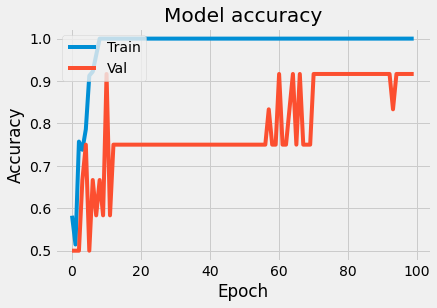

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

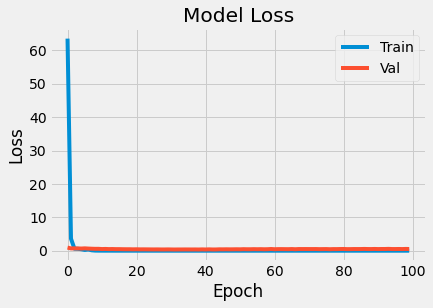

In [28]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()